In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, BatchNormalization, Input, Dropout

from sklearn.model_selection import train_test_split

2023-10-06 05:29:27.963580: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-06 05:29:28.037374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
Rx_sig = np.load('../data/output_COV.npy')
angle  = np.load('../data/output_angle_array.npy')

In [3]:
# import train data
x_train = np.array([[np.real(Rxx), np.imag(Rxx), np.angle(Rxx)] for Rxx in Rx_sig[:45000]])
y_train = angle[:45000]

# import test data
x_test = np.array([[np.real(Rxx), np.imag(Rxx), np.angle(Rxx)] for Rxx in Rx_sig[45000:]])
y_test = angle[45000:]

# reshape
x_train = np.transpose(x_train, (0, 2, 3, 1))
x_test = np.transpose(x_test, (0, 2, 3, 1))

# generate validation data from test data
x_val, _, y_val,_ = train_test_split(x_test, y_test, test_size=0.6, random_state=1)

# print
print(f"train data - {x_train.shape}, {y_train.shape}")
print(f"valid data - {x_val.shape}, {y_val.shape}")
print(f"test  data - {x_test.shape}, {y_test.shape}")

train data - (45000, 4, 4, 3), (45000, 121)
valid data - (2000, 4, 4, 3), (2000, 121)
test  data - (5000, 4, 4, 3), (5000, 121)


In [4]:
## parameter
batch_siz = 32
epochs = 20
dropout_rate = 0.5
batch_norm = 0.9


## CNN 신경망 모델 설계
CNN_input=Input(shape=(4, 4, 3))  # [Re, Im, Angle] 

x=Conv2D(256,(1,1))(CNN_input)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Conv2D(256,(2,2))(x)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Conv2D(256,(2,2))(x)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Conv2D(256,(2,2))(x)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Flatten()(x)

x=Dense(4096)(x)
x=Activation('relu')(x)
x=Dropout(dropout_rate)(x)
x=Dense(2048)(x)
x=Activation('relu')(x)
x=Dropout(dropout_rate)(x)
x=Dense(1024)(x)
x=Activation('relu')(x)
x=Dropout(dropout_rate)(x)
CNN_output=Dense(121, activation='sigmoid')(x)    # -60 ~ 60
CNN_Model=Model(CNN_input, CNN_output)

CNN_Model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
CNN_Model.summary()

## 학습
# hist=CNN_Model.fit(x_train, y_train, batch_size=batch_siz, epochs=epochs)
hist=CNN_Model.fit(x_train, y_train, batch_size=batch_siz, epochs=epochs,
                  validation_data=(x_val,y_val), verbose=1)


## 평가
res=CNN_Model.evaluate(x_test,y_test,verbose=0)

2023-10-06 05:29:30.365427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-06 05:29:30.375588: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-06 05:29:30.375925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-06 05:29:30.376992: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-06 05:29:30.377273: I tensorflow/compile

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 4, 3)]         0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 256)         1024      
                                                                 
 batch_normalization (Batch  (None, 4, 4, 256)         1024      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 4, 4, 256)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 256)         262400    
                                                                 
 batch_normalization_1 (Bat  (None, 3, 3, 256)         1024      
 chNormalization)                                            

2023-10-06 05:29:33.410276: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-06 05:29:34.309104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-06 05:29:34.313922: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f58ccb0f670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-06 05:29:34.313954: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-10-06 05:29:34.317499: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-06 05:29:34.405140: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

1407/1407 [==============================] - 15s 8ms/step - loss: 0.0282 - accuracy: 0.2717 - val_loss: 0.0175 - val_accuracy: 0.4465
Epoch 2/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0175 - accuracy: 0.4686 - val_loss: 0.0122 - val_accuracy: 0.6575
Epoch 3/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0149 - accuracy: 0.5544 - val_loss: 0.0105 - val_accuracy: 0.7195
Epoch 4/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0134 - accuracy: 0.6127 - val_loss: 0.0094 - val_accuracy: 0.7680
Epoch 5/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0123 - accuracy: 0.6545 - val_loss: 0.0079 - val_accuracy: 0.8195
Epoch 6/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0114 - accuracy: 0.6912 - val_loss: 0.0079 - val_accuracy: 0.7940
Epoch 7/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0108 - accuracy: 0.7148 - val_loss: 0.0079 - val_accuracy: 0.8

정확률: 90.21999835968018


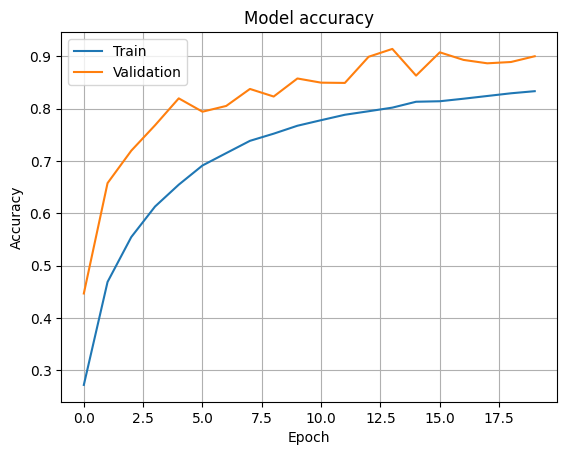

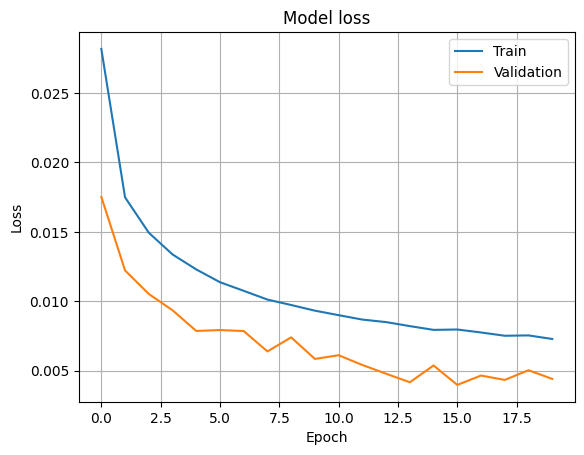

In [8]:
print(f'정확률: {res[1]*100}')

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()